### Import Dependencies

In [1]:
# import data processing libraries
import pandas as pd
pd.options.mode.chained_assignment = None #default='warn'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
from scipy import stats

# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

#import ML libraries For preprocessing and scoring
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

# Ensemble Model Libraries
import lightgbm as lgb 

### Read Dataset

In [2]:
# df = pd.read_csv(r"C:\Users\SiKu753\Documents\AI_Studio\test_data\MLFlow-diabetes2\MLFlow-diabetes\pima-indians-diabetes.csv")
df = pd.read_csv(r"../pima-indians-diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
def plot_histograms(df: pd.DataFrame, cols: list, bins: int = 10):
    """
    Plot histograms for a list of columns in a dataframe
    """
    if len(cols) > 1:
        ncols = 2
        nrows = int(np.ceil(len(cols) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
    for col, ax in zip(cols, axes.flatten()):
        # df[col].hist(bins=bins, ax=ax)
        sns.histplot(df[col], bins=bins, ax=ax, kde=True)
        ax.set_title(col)
    plt.tight_layout()
    plt.show()
    return 'Done'


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

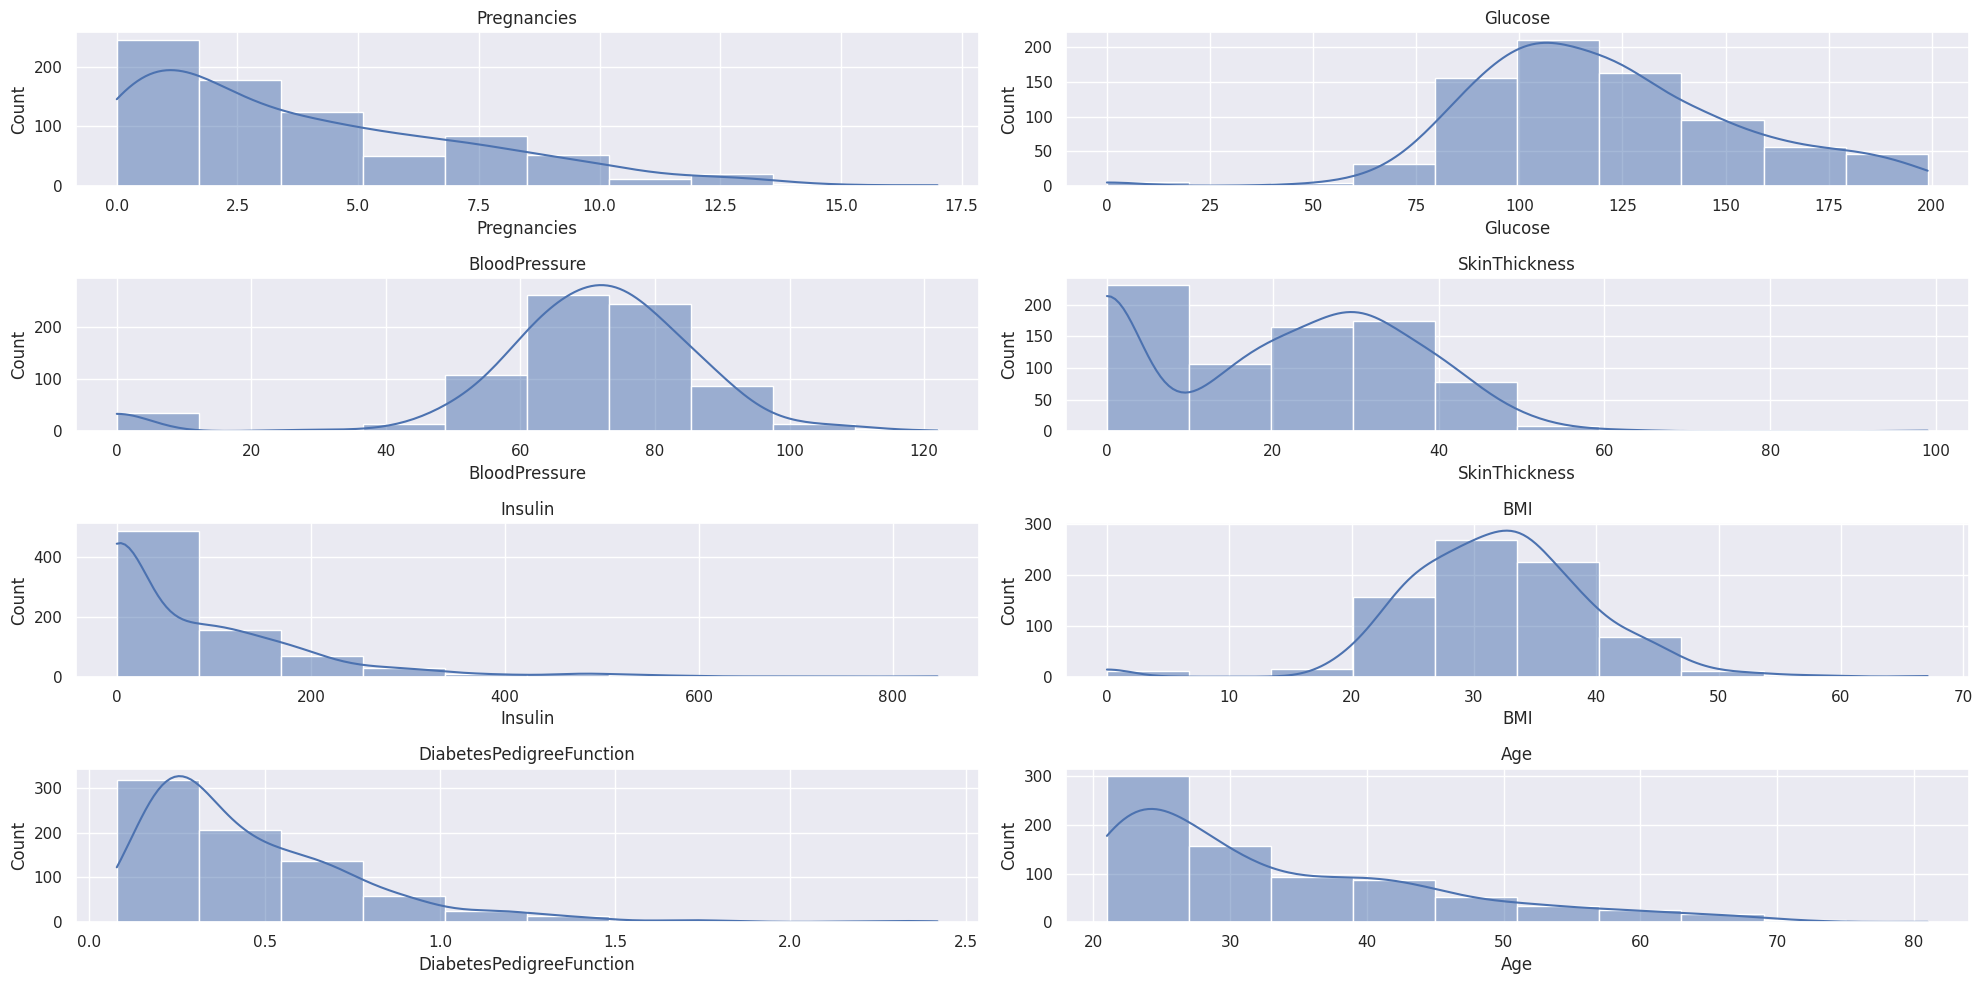

'Done'

In [7]:
cols = [col for col in df.columns if col!="Outcome"]
plot_histograms(df, cols)

## Transform and Scale features

In [24]:
def PowerTransform(df: pd.DataFrame, cols)->pd.DataFrame:
    """
    Function to apply Power Transformer (box-cox) and min/max scaling to numerical variables
    o/p: df_out (df with transformed cols only)
    """
    
    transformed_cols = [f"{x}_tr" for x in cols]
    tr_sc_cols = [f"{x}_sc_tr" for x in cols]
    tr = PowerTransformer(method='yeo-johnson', standardize=False)
    df_tr = pd.DataFrame(tr.fit_transform(df[cols]), columns=transformed_cols)

    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(df_tr), columns=tr_sc_cols)

num_cols = [cols for cols in df.columns if cols not in ["Outcome","Pregnancies"]]
cat_features = ["Pregnancies"]

X = pd.concat([PowerTransform(df, num_cols), df[cat_features]], axis=1)
y = df["Outcome"]

print(X.columns.to_list())
# print(df.columns)

['Glucose_sc_tr', 'BloodPressure_sc_tr', 'SkinThickness_sc_tr', 'Insulin_sc_tr', 'BMI_sc_tr', 'DiabetesPedigreeFunction_sc_tr', 'Age_sc_tr', 'Pregnancies']


In [25]:
X.to_csv('../features.csv')

Outcome
0    500
1    268
Name: count, dtype: int64

### Split Dataset in test/train

In [26]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [34]:
print(len(df.loc[df['Outcome']==0]) / len(df))
print(len([x for x in y_train if x==0]) / len(y_train))
print(len([x for x in y_test if x==0]) / len(y_test))

0.6510416666666666
0.6514657980456026
0.6493506493506493


## Train LGBM

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

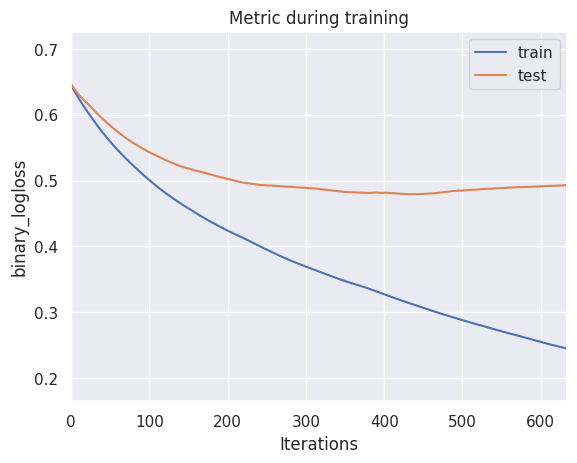

In [41]:
params = {'task': 'train', 
          'boosting_type': 'gbdt', 
          'objective': 'binary', 
          'metric': ['logloss'], 
          'learning_rate': 0.005, 
          'verbose': 0, 
          'max_depth': 64, 
          'num_leaves': 128, 
          'max_bin': 512, 
          'num_iterations': 1000, 
          'random_state': '100'}
gbm = lgb.LGBMClassifier(**params)
model = gbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_names=['train', 'test'],categorical_feature=cat_features, eval_metric='logloss', callbacks=[lgb.early_stopping(200)])
lgb.plot_metric(model)



In [42]:
# pickle and save model
import pickle as pkl
with open(f'../lgbm_model.pkl', 'wb') as f:
  pkl.dump(model, f)
print(f'Model Saved: ../lgbm_model.pkl')


Model Saved: ../lgbm_model.pkl


In [45]:
# predictions
y = y_test
y_hat = model.predict(X_test)
len(y_hat)

154

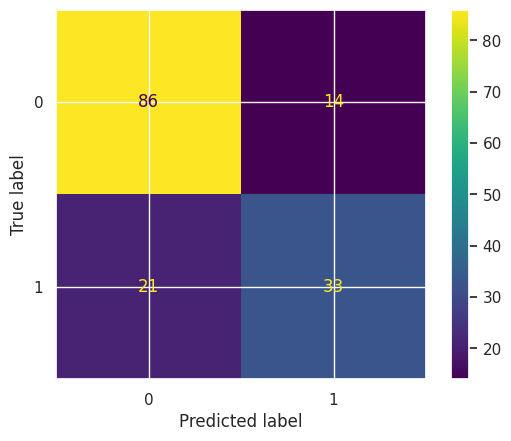

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)

cm_display = ConfusionMatrixDisplay(cm).plot()

## ROC Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


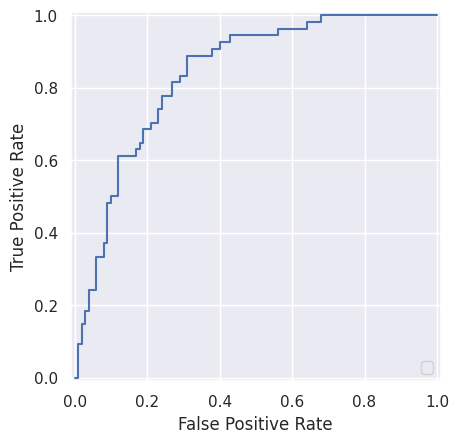

In [60]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## PR Curve

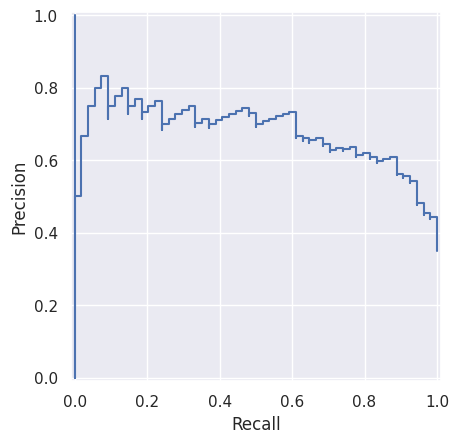

In [61]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
